# UNAD
## Cristian Sebastian Santos Gonzalez
## Predecir quién sobrevivió al naufragio con Regresión Logística
## Pasos de la actividad

1.
Realizar un análisis exploratorio de los datos para identificar relaciones entre variables, valores atípicos, tendencias, etc.
2.
Preprocesar los datos limpiándolos, tratando valores faltantes y transformándolos según sea necesario.
3.
Seleccionar las características más relevantes para entrenar el modelo utilizando selección de características.
4.
Dividir el dataset en Train y Test para evaluar correctamente el modelo.
5.
Entrenar el modelo configurando los diferentes hiperparámetros.
6.
Evaluar el desempeño del modelo en el conjunto de Test con métricas como precisión, recall, F1-score, etc.
7.
Realizar las diferentes gráficas que permitan visualizar los resultados del modelo.
8.
Interpretar, analizar y documentar los resultados obtenidostados obtenidos

## 1. Realizar un análisis exploratorio de los datos para identificar relaciones entre variables, valores atípicos, tendencias, etc.

In [4]:
#cargar librerias

import pandas as pd # Manejo y análisis de estructuras de datos
import numpy as np # Cálculo numérico y el análisis de datos
import seaborn as sns # Creación gráficos estadísticos
import matplotlib.pyplot as plt # Creación de gráficos en dos dimensiones

# librerías para implementar modelos de ciencia de datos
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

In [59]:
# lectura de datos en Python y lo cargamos en la variable Data

Data = pd.read_csv('./Titanic-Dataset.csv')

In [9]:
#Lectura de los datos para el analisis exploratorio

Data.head(50)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [10]:
#Descripcion de los datos

Data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [12]:
# Verificar valores faltantes
missing_values = Data.isnull().sum()
print(missing_values)

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


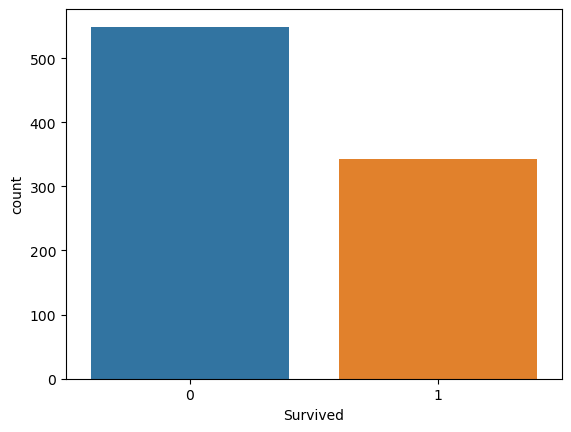

In [25]:
# Distribución de las variables categoricas 'Survived'
sns.countplot(x='Survived', data=Data)
plt.show()

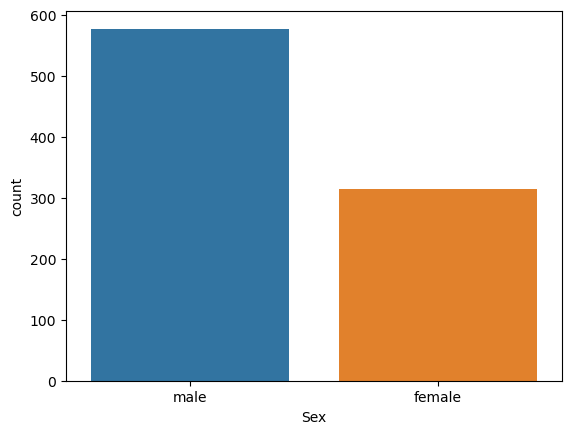

In [62]:
sns.countplot(x='Sex', data=Data)
plt.show()

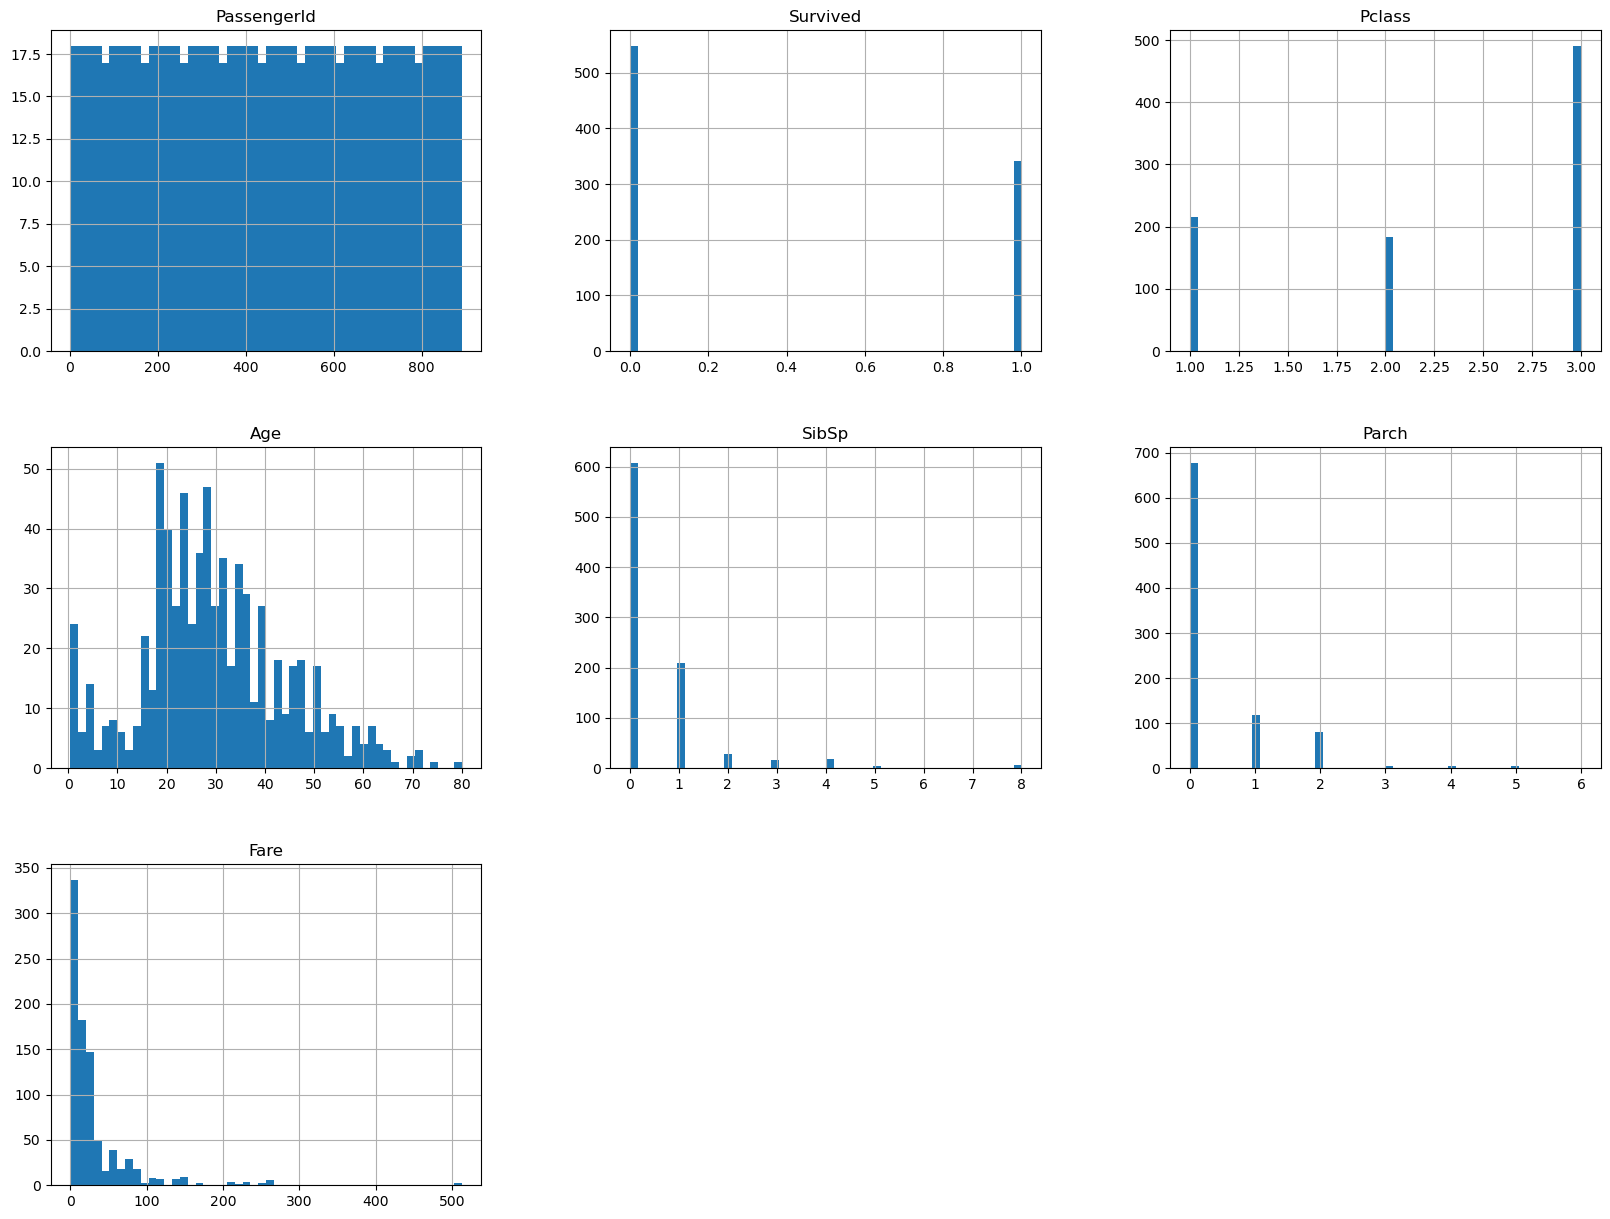

In [16]:
# Histograma de las variables numéricas
Data.hist(bins=50, figsize=(20,15))
plt.show()

Text(0.5, 1.0, 'Identificación de Datos Faltantes y Atípicos')

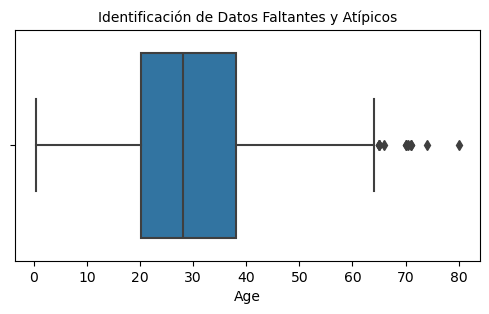

In [18]:
#Identificar Datos Faltantes y Atípicos

plt.figure(figsize=(6, 3))
sns.boxplot(x=Data['Age'])
plt.title('Identificación de Datos Faltantes y Atípicos', fontsize=10 )

## 2. Preprocesar los datos limpiándolos, tratando valores faltantes y transformándolos según sea necesario

In [32]:
# Llenar valores faltantes o eliminarlos dependiendo de la estrategia
# Llenar valores faltantes con la media para una columna específica
Data['Age'].fillna(Data['Age'].mean(), inplace=True)

In [ ]:
# Eliminacion de 3 columnas
Data = Data.drop(columns=['Embarked', 'Cabin', 'Ticket'])

In [44]:
# Eliminacion de  columnas
Data = Data.drop(columns=['Name'])

In [49]:
# Eliminacion de  columnas
Data = Data.drop(columns=['Sex'])

In [50]:
Data.head(50)

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
0,1,0,3,22.000000,1,0,7.2500
1,2,1,1,38.000000,1,0,71.2833
2,3,1,3,26.000000,0,0,7.9250
3,4,1,1,35.000000,1,0,53.1000
4,5,0,3,35.000000,0,0,8.0500
5,6,0,3,29.699118,0,0,8.4583
6,7,0,1,54.000000,0,0,51.8625
7,8,0,3,2.000000,3,1,21.0750
8,9,1,3,27.000000,0,2,11.1333
9,10,1,2,14.000000,1,0,30.0708


## 3. Seleccionar las características más relevantes para entrenar el modelo utilizando selección de características

Características:
- Condición: Personas sobrevientes(0= No - 1= Si).
- Predecir si la persona sobrevivio

In [33]:
# Total de personas sobrevivientes

Data['Survived'].value_counts()

Survived
0    549
1    342
Name: count, dtype: int64

In [35]:
Data[['Survived']].head(50)

,Survived
0,0
1,1
2,1
3,1
4,0
5,0
6,0
7,0
8,1
9,1


## 4. Dividir el dataset en Train y Test para evaluar correctamente el modelo

In [51]:
# Porcentaje de datos para entrenamiento (train) = 75% , y para prueba (test) = 25%

# Se crean variables X y Y para almacenar la información del entrenamiento

X = Data.drop('Survived',axis=1) # Se cargan los datos de train sin los datos de la columna Survived
Y = Data['Survived'] # Se cargan los datos de train con los datos de la la columna Survived

#La función train_test_split crea una división de un conjunto de datos en dos bloques uno de entrenamiento y otro de prueba (train and test)
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.25, stratify=Y, random_state= 0)

In [37]:
print (X_train)

     PassengerId  Pclass                                               Name  \
671          672       1                             Davidson, Mr. Thornton   
417          418       2                      Silven, Miss. Lyyli Karoliina   
634          635       3                                 Skoog, Miss. Mabel   
323          324       2  Caldwell, Mrs. Albert Francis (Sylvia Mae Harb...   
379          380       3                        Gustafsson, Mr. Karl Gideon   
..           ...     ...                                                ...   
131          132       3                     Coelho, Mr. Domingos Fernandeo   
490          491       3               Hagland, Mr. Konrad Mathias Reiersen   
528          529       3                          Salonen, Mr. Johan Werner   
48            49       3                                Samaan, Mr. Youssef   
80            81       3                               Waelens, Mr. Achille   

        Sex        Age  SibSp  Parch     Fare  
671

In [38]:
print (Y_train)

671    0
417    1
634    0
323    1
379    0
      ..
131    0
490    0
528    0
48     0
80     0
Name: Survived, Length: 668, dtype: int64


## 5. Entrenar el modelo configurando los diferentes hiperparámetros

In [53]:
# Construimos el modelo de regresión logística 

modelo_regresion = LogisticRegression(solver = "liblinear") # liblinear es una libreria para resolver problemas lineales de clasificación y regresión
modelo_regresion.fit (X_train , Y_train)   

# Creamos el modelo de predicción
Prediccion = modelo_regresion.predict(X_test) # la función predict predice los valores a partir del conjunto de datos de validación

In [54]:
print (Y_test)

288    1
869    1
182    0
684    0
599    1
      ..
882    0
434    0
304    0
500    0
633    0
Name: Survived, Length: 223, dtype: int64


In [55]:
print (Prediccion)

[0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 1 0 0 0 0 1 1 0 0 0 0 0 0 0 1 0 0
 1 1 0 0 0 0 1 0 0 1 0 1 0 0 0 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0
 0 0 1 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 1 0 0 1 1 0
 0 0 1 0 0 0 1 0 1 0 0 0 0 1 1 1 0 1 0 1 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0
 0 0 0 0 0 0 0 0 0 1 1 1 0 0 1 1 0 1 0 0 0 1 0 0 0 1 0 0 0 0 0 1 0 0 0 0 1
 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 1 0 0 0 0 1 1 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0
 1]


## 6. Evaluar el desempeño del modelo en el conjunto de Test con métricas como precisión, recall, F1-score, etc

In [56]:
# Desempeño del modelo de regresión

print(classification_report(Y_test,Prediccion))

              precision    recall  f1-score   support

           0       0.69      0.86      0.77       137
           1       0.63      0.38      0.48        86

    accuracy                           0.68       223
   macro avg       0.66      0.62      0.62       223
weighted avg       0.67      0.68      0.66       223



## 7. Realizar las diferentes gráficas que permitan visualizar los resultados del modelo.

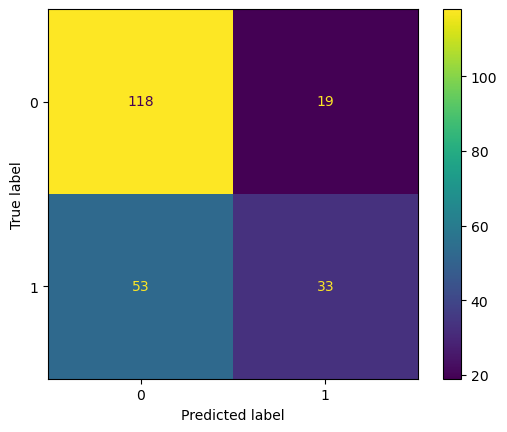

In [57]:
#Matrix de Confusión del modelo

cm=confusion_matrix(Y_test,Prediccion)
disp=metrics.ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()

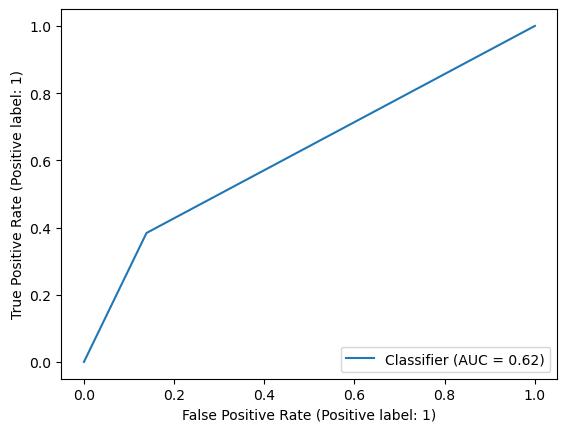

In [58]:
# Curva de precisón del modelo

from sklearn.metrics import RocCurveDisplay
RocCurveDisplay.from_predictions(Y_test, Prediccion)
plt.show()

## 8. Interpretar, analizar y documentar los resultados obtenidos